# Explore here

It's recommended to use this notebook for exploration purposes.

In [85]:
import requests
import pandas as pd
import time
from bs4 import BeautifulSoup as bs 
import io
import sqlite3


web = ('https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue')

headers =  {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}

data_ = requests.get(web, time.sleep(10), headers = headers)

data_string = io.StringIO(data_.text)

#table_ = pd.read_html(data_string)[0] not necessary

table_2 = pd.read_html(data_string)[1]

#annual_rev = pd.DataFrame(table_) not necessary

quarterly_rev = pd.DataFrame(table_2)

tesla_quarterly = quarterly_rev.rename(columns= {'Tesla Quarterly Revenue (Millions of US $)' : 'Date','Tesla Quarterly Revenue (Millions of US $).1' : 'Revenue'})


In [86]:
#Cleaning the data

tesla_quarterly = tesla_quarterly[tesla_quarterly['Revenue'].notna()]

tesla_quarterly['Revenue'] = tesla_quarterly['Revenue'].apply(lambda x: x.replace("$", ""))

tesla_quarterly['Revenue'] = tesla_quarterly['Revenue'].apply(lambda x: x.replace(",", ""))

tesla_quarterly

,Date,Revenue
0,2023-06-30,24927
1,2023-03-31,23329
2,2022-12-31,24318
3,2022-09-30,21454
4,2022-06-30,16934
5,2022-03-31,18756
6,2021-12-31,17719
7,2021-09-30,13757
8,2021-06-30,11958
9,2021-03-31,10389


In [87]:
#Store the data in SQL
import sqlite3

conn = sqlite3.connect("Tesla_revenue.db")
cur = conn.cursor()
cur.execute("""CREATE TABLE Revenue (Date, Revenue)""")

OperationalError: table Revenue already exists

In [ ]:
import numpy as np
tesla_sql = tesla_quarterly.to_numpy().tolist()
tesla_sql[:2]

[['2023-06-30', '24927'], ['2023-03-31', '23329']]

In [ ]:
cur.executemany("INSERT INTO revenue VALUES (?,?)", tesla_sql)
conn.commit()

In [ ]:
#Checking if is OK
for row in cur.execute("SELECT * FROM Revenue"):
    print(row)

('2023-06-30', '24927')
('2023-03-31', '23329')
('2022-12-31', '24318')
('2022-09-30', '21454')
('2022-06-30', '16934')
('2022-03-31', '18756')
('2021-12-31', '17719')
('2021-09-30', '13757')
('2021-06-30', '11958')
('2021-03-31', '10389')
('2020-12-31', '10744')
('2020-09-30', '8771')
('2020-06-30', '6036')
('2020-03-31', '5985')
('2019-12-31', '7384')
('2019-09-30', '6303')
('2019-06-30', '6350')
('2019-03-31', '4541')
('2018-12-31', '7226')
('2018-09-30', '6824')
('2018-06-30', '4002')
('2018-03-31', '3409')
('2017-12-31', '3288')
('2017-09-30', '2985')
('2017-06-30', '2790')
('2017-03-31', '2696')
('2016-12-31', '2285')
('2016-09-30', '2298')
('2016-06-30', '1270')
('2016-03-31', '1147')
('2015-12-31', '1214')
('2015-09-30', '937')
('2015-06-30', '955')
('2015-03-31', '940')
('2014-12-31', '957')
('2014-09-30', '852')
('2014-06-30', '769')
('2014-03-31', '621')
('2013-12-31', '615')
('2013-09-30', '431')
('2013-06-30', '405')
('2013-03-31', '562')
('2012-12-31', '306')
('2012-09-30

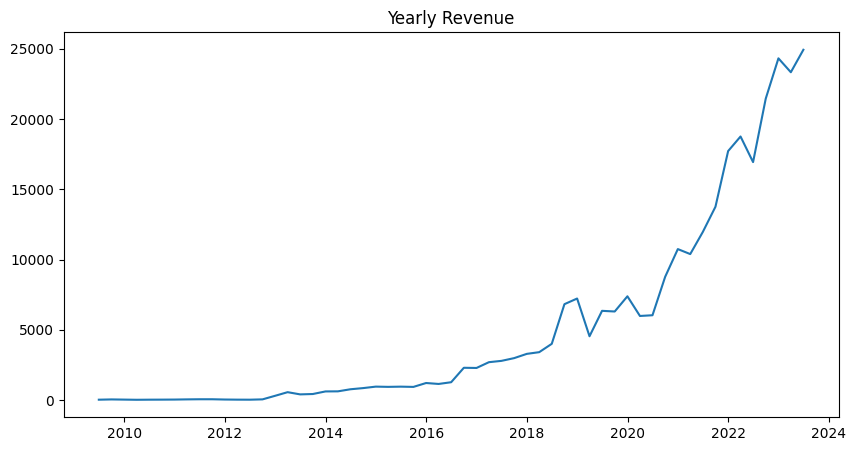

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Data visualization
x = tesla_quarterly['Date']
y = tesla_quarterly['Revenue']

plt.figure(figsize = (10, 5))
plt.plot(x, y)
plt.title('Yearly Revenue')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

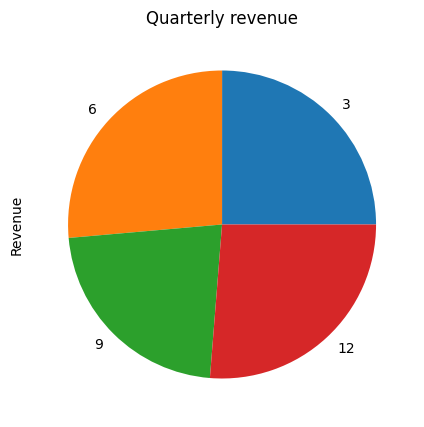

In [ ]:
monthly_revenue = tesla_quarterly.groupby(tesla_quarterly.Date.dt.month)['Revenue'].sum()
monthly_revenue.plot.pie(figsize=(10, 5))
plt.title('Quarterly revenue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

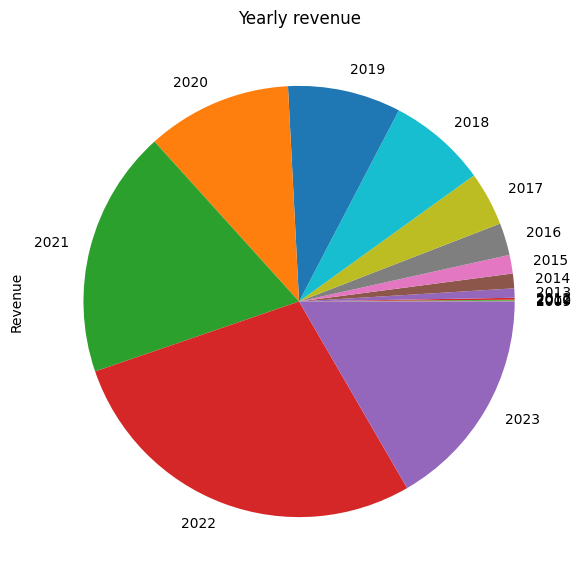

In [ ]:
yearly_revenue = tesla_quarterly.groupby(tesla_quarterly.Date.dt.year)['Revenue'].sum()
yearly_revenue.plot.pie(figsize=(10, 7))
plt.title('Yearly revenue')
plt.show

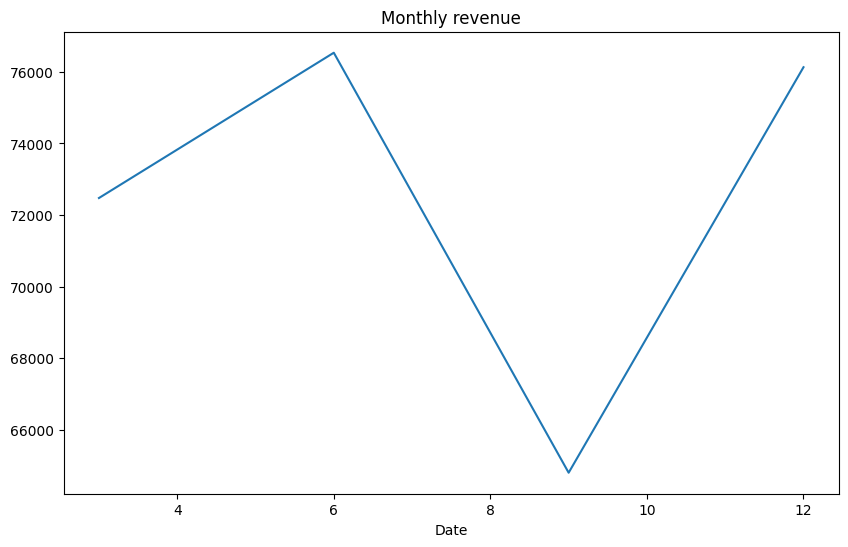

In [79]:
monthly_revenue.plot.line(y=['Date'], figsize=(10,6))
plt.title('Monthly revenue')
plt.show()